In [2]:
! pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 1.4 MB/s eta 0:01:50
   ---------------------------------------- 0.3/150.0 MB 5.0 MB/s eta 0:00:31
   ---------------------------------------- 1.4/150.0 MB 15.1 MB/s eta 0:00:10
    --------------------------------------- 2.0/150.0 MB 12.8 MB/s eta 0:00:12
    --------------------------------------- 2.1/150.0 MB 11.4 MB/s eta 0:00:13
   - -------------------------------------- 3.9/150.0 MB 17.9 MB/s eta 0:00:09
   - -------------------------------------- 5.0/150.0 MB 18.7 MB/s eta 0:00:08
   - -------------------------------------- 6.0/150.0 MB 19.2 MB/s eta 0:00:08
   - -------------------------------------- 7.3/150.0 MB 20.3 MB/s eta 0:00:08
   -- ------------------------------------- 8.3/150.0 MB 20.5 MB/s eta 0:00:07
   -- ------------------------------------- 9.6/150.0 MB 21.2 MB/s eta 0:00:07
   -- ------------------------------------- 10.4/150.0 MB 23.4


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [187]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.utils import resample

In [188]:
df=pd.read_csv("C:/데이터 폴더/건강검진.csv")

In [189]:
df

,YEAR,ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
0,2017,1,1,8,43,170,75,90.0,120,80,99,193.0,92.0,48.0,126.0,17.1,1,1.0,21.0,35.0,40.0,1,1,26.0,class1,False,normal,pre,False,False,False
1,2017,2,1,7,11,180,80,89.0,130,82,106,228.0,121.0,55.0,148.0,15.8,1,0.9,20.0,36.0,27.0,3,0,24.7,pre,False,pre,pre,False,False,False
2,2017,3,1,9,41,165,75,91.0,120,70,98,136.0,104.0,41.0,74.0,15.8,1,0.9,47.0,32.0,68.0,1,0,27.5,class1,False,normal,pre,True,False,False
3,2017,4,1,11,48,175,80,91.0,145,87,95,201.0,106.0,76.0,104.0,17.6,1,1.1,29.0,34.0,18.0,1,0,26.1,class1,False,normal,stage1,False,False,False
4,2017,5,1,11,30,165,60,80.0,138,82,101,199.0,104.0,61.0,117.0,13.8,1,0.8,19.0,12.0,25.0,1,0,22.0,normal,False,pre,pre,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386508,2022,2134210,1,6,43,170,90,98.8,128,84,88,245.0,150.0,35.0,180.0,15.8,1,0.9,95.0,251.0,77.0,1,1,31.1,class2,True,normal,pre,True,False,False
2386509,2022,1686113,2,15,27,150,85,116.0,136,81,134,240.0,108.0,73.0,145.0,12.4,1,1.4,59.0,49.0,25.0,1,0,37.8,class3,True,diabetes,pre,True,False,False
2386510,2022,902951,1,12,45,165,80,98.2,119,83,181,205.0,191.0,47.0,120.0,15.7,1,1.0,48.0,82.0,60.0,2,1,29.4,class1,False,diabetes,pre,True,False,False
2386511,2022,3721315,1,6,47,175,65,75.4,109,60,91,178.0,61.0,54.0,112.0,13.7,1,1.1,245.0,72.0,17.0,2,1,21.2,normal,False,normal,normal,True,False,False


In [190]:
print(df['OBESITY'].unique())
print(df['DIABETES'].unique())
print(df['HYPERTENSION'].unique())


['class1' 'pre' 'normal' 'class2' 'class3']
['normal' 'pre' 'diabetes']
['pre' 'stage1' 'normal' 'stage2']


In [191]:
df.shape

(2386513, 31)

In [192]:
df.head()

,YEAR,ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
0,2017,1,1,8,43,170,75,90.0,120,80,99,193.0,92.0,48.0,126.0,17.1,1,1.0,21.0,35.0,40.0,1,1,26.0,class1,False,normal,pre,False,False,False
1,2017,2,1,7,11,180,80,89.0,130,82,106,228.0,121.0,55.0,148.0,15.8,1,0.9,20.0,36.0,27.0,3,0,24.7,pre,False,pre,pre,False,False,False
2,2017,3,1,9,41,165,75,91.0,120,70,98,136.0,104.0,41.0,74.0,15.8,1,0.9,47.0,32.0,68.0,1,0,27.5,class1,False,normal,pre,True,False,False
3,2017,4,1,11,48,175,80,91.0,145,87,95,201.0,106.0,76.0,104.0,17.6,1,1.1,29.0,34.0,18.0,1,0,26.1,class1,False,normal,stage1,False,False,False
4,2017,5,1,11,30,165,60,80.0,138,82,101,199.0,104.0,61.0,117.0,13.8,1,0.8,19.0,12.0,25.0,1,0,22.0,normal,False,pre,pre,False,False,False


In [137]:
df.tail()

,YEAR,ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
2386508,2022,2134210,1,6,43,170,90,98.8,128,84,88,245.0,150.0,35.0,180.0,15.8,1,0.9,95.0,251.0,77.0,1,1,31.1,class2,True,normal,pre,True,False,False
2386509,2022,1686113,2,15,27,150,85,116.0,136,81,134,240.0,108.0,73.0,145.0,12.4,1,1.4,59.0,49.0,25.0,1,0,37.8,class3,True,diabetes,pre,True,False,False
2386510,2022,902951,1,12,45,165,80,98.2,119,83,181,205.0,191.0,47.0,120.0,15.7,1,1.0,48.0,82.0,60.0,2,1,29.4,class1,False,diabetes,pre,True,False,False
2386511,2022,3721315,1,6,47,175,65,75.4,109,60,91,178.0,61.0,54.0,112.0,13.7,1,1.1,245.0,72.0,17.0,2,1,21.2,normal,False,normal,normal,True,False,False
2386512,2022,4901217,2,14,11,150,40,74.1,137,87,173,170.0,88.0,58.0,94.0,14.3,1,0.9,58.0,42.0,27.0,1,0,17.8,normal,False,diabetes,pre,True,False,False


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386513 entries, 0 to 2386512
Data columns (total 31 columns):
 #   Column            Dtype  
---  ------            -----  
 0   YEAR              int64  
 1   ID                int64  
 2   SEX               int64  
 3   AGE_GROUP         int64  
 4   SIDO              int64  
 5   HEIGHT            int64  
 6   WEIGHT            int64  
 7   WAIST             float64
 8   BP_HIGH           int64  
 9   BP_LWST           int64  
 10  BLDS              int64  
 11  TOT_CHOLE         float64
 12  TRIGLYCERIDE      float64
 13  HDL_CHOLE         float64
 14  LDL_CHOLE         float64
 15  HMG               float64
 16  OLIG_PROTE_CD     int64  
 17  CREATININE        float64
 18  SGOT_AST          float64
 19  SGPT_ALT          float64
 20  GAMMA_GTP         float64
 21  SMK_STAT_TYPE_CD  int64  
 22  DRK_YN            int64  
 23  BMI               float64
 24  OBESITY           object 
 25  DYSLIPIDEMIA      bool   
 26  DIABETES      

In [193]:
df["Year_ID"] = df["YEAR"].astype(str) + "_" + df["ID"].astype(str)

cols = ['Year_ID'] + [col for col in df.columns if col != 'Year_ID']
df = df[cols]
# 불필요한 컬럼 제거 (ID, YEAR는 UNIQUE_ID로 대체되었으므로 제거)
df = df.drop(['ID', 'YEAR'], axis=1)

In [140]:
df.head()

,Year_ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
0,2017_1,1,8,43,170,75,90.0,120,80,99,193.0,92.0,48.0,126.0,17.1,1,1.0,21.0,35.0,40.0,1,1,26.0,class1,False,normal,pre,False,False,False
1,2017_2,1,7,11,180,80,89.0,130,82,106,228.0,121.0,55.0,148.0,15.8,1,0.9,20.0,36.0,27.0,3,0,24.7,pre,False,pre,pre,False,False,False
2,2017_3,1,9,41,165,75,91.0,120,70,98,136.0,104.0,41.0,74.0,15.8,1,0.9,47.0,32.0,68.0,1,0,27.5,class1,False,normal,pre,True,False,False
3,2017_4,1,11,48,175,80,91.0,145,87,95,201.0,106.0,76.0,104.0,17.6,1,1.1,29.0,34.0,18.0,1,0,26.1,class1,False,normal,stage1,False,False,False
4,2017_5,1,11,30,165,60,80.0,138,82,101,199.0,104.0,61.0,117.0,13.8,1,0.8,19.0,12.0,25.0,1,0,22.0,normal,False,pre,pre,False,False,False


In [141]:
df['OBESITY'].value_counts()

OBESITY
normal    989724
class1    799269
pre       467218
class2    112755
class3     17547
Name: count, dtype: int64

In [142]:
df['DYSLIPIDEMIA'].value_counts()

DYSLIPIDEMIA
False    1649648
True      736865
Name: count, dtype: int64

In [143]:
df['DIABETES'].value_counts()

DIABETES
normal      1411130
pre          775873
diabetes     199510
Name: count, dtype: int64

In [144]:
df['HYPERTENSION'].value_counts()

HYPERTENSION
pre       1158871
normal     880765
stage1     275103
stage2      71774
Name: count, dtype: int64

In [145]:
df['LIVER_ABNORMAL'].value_counts()

LIVER_ABNORMAL
False    2008886
True      377627
Name: count, dtype: int64

In [146]:
df['KIDNEY_ABNORMAL'].value_counts()

KIDNEY_ABNORMAL
False    2378905
True        7608
Name: count, dtype: int64

In [147]:
df['ANEMIA'].value_counts()

ANEMIA
False    2220221
True      166292
Name: count, dtype: int64

In [148]:
df.describe()

,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI
count,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06
mean,1.438121e+00,1.083471e+01,3.365736e+01,1.626326e+02,6.420943e+01,8.198824e+01,1.234692e+02,7.634183e+01,1.015120e+02,1.966778e+02,1.282414e+02,5.700082e+01,1.144473e+02,1.432345e+01,1.108920e+00,8.622675e-01,2.691778e+01,2.679388e+01,3.793744e+01,1.598080e+00,6.275034e-01,2.414292e+01
std,4.961563e-01,2.791896e+00,1.267557e+01,9.406311e+00,1.288249e+01,1.069816e+01,1.455371e+01,9.991953e+00,2.390166e+01,4.025533e+01,8.448973e+01,1.667298e+01,3.758783e+01,1.573719e+00,4.625220e-01,4.700929e-01,2.264178e+01,2.639495e+01,5.603600e+01,7.933833e-01,4.834697e-01,3.598924e+00
min,1.000000e+00,5.000000e+00,1.100000e+01,1.300000e+02,2.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,9.800000e+00
25%,1.000000e+00,9.000000e+00,2.700000e+01,1.550000e+02,5.500000e+01,7.500000e+01,1.130000e+02,7.000000e+01,8.900000e+01,1.700000e+02,7.500000e+01,4.600000e+01,8.900000e+01,1.330000e+01,1.000000e+00,7.000000e-01,1.900000e+01,1.500000e+01,1.600000e+01,1.000000e+00,0.000000e+00,2.150000e+01
50%,1.000000e+00,1.100000e+01,4.100000e+01,1.650000e+02,6.500000e+01,8.200000e+01,1.220000e+02,7.600000e+01,9.700000e+01,1.950000e+02,1.070000e+02,5.500000e+01,1.130000e+02,1.440000e+01,1.000000e+00,8.000000e-01,2.300000e+01,2.100000e+01,2.400000e+01,1.000000e+00,1.000000e+00,2.390000e+01
75%,2.000000e+00,1.300000e+01,4.300000e+01,1.700000e+02,7.000000e+01,8.800000e+01,1.320000e+02,8.200000e+01,1.060000e+02,2.210000e+02,1.580000e+02,6.500000e+01,1.370000e+02,1.550000e+01,1.000000e+00,1.000000e+00,2.900000e+01,3.100000e+01,4.000000e+01,2.000000e+00,1.000000e+00,2.610000e+01
max,2.000000e+00,1.800000e+01,5.000000e+01,1.950000e+02,1.400000e+02,9.990000e+02,2.730000e+02,1.850000e+02,9.610000e+02,2.635000e+03,9.490000e+03,8.110000e+03,5.119000e+03,2.500000e+01,6.000000e+00,3.160000e+02,9.999000e+03,7.210000e+03,9.999000e+03,3.000000e+00,1.000000e+00,5.620000e+01


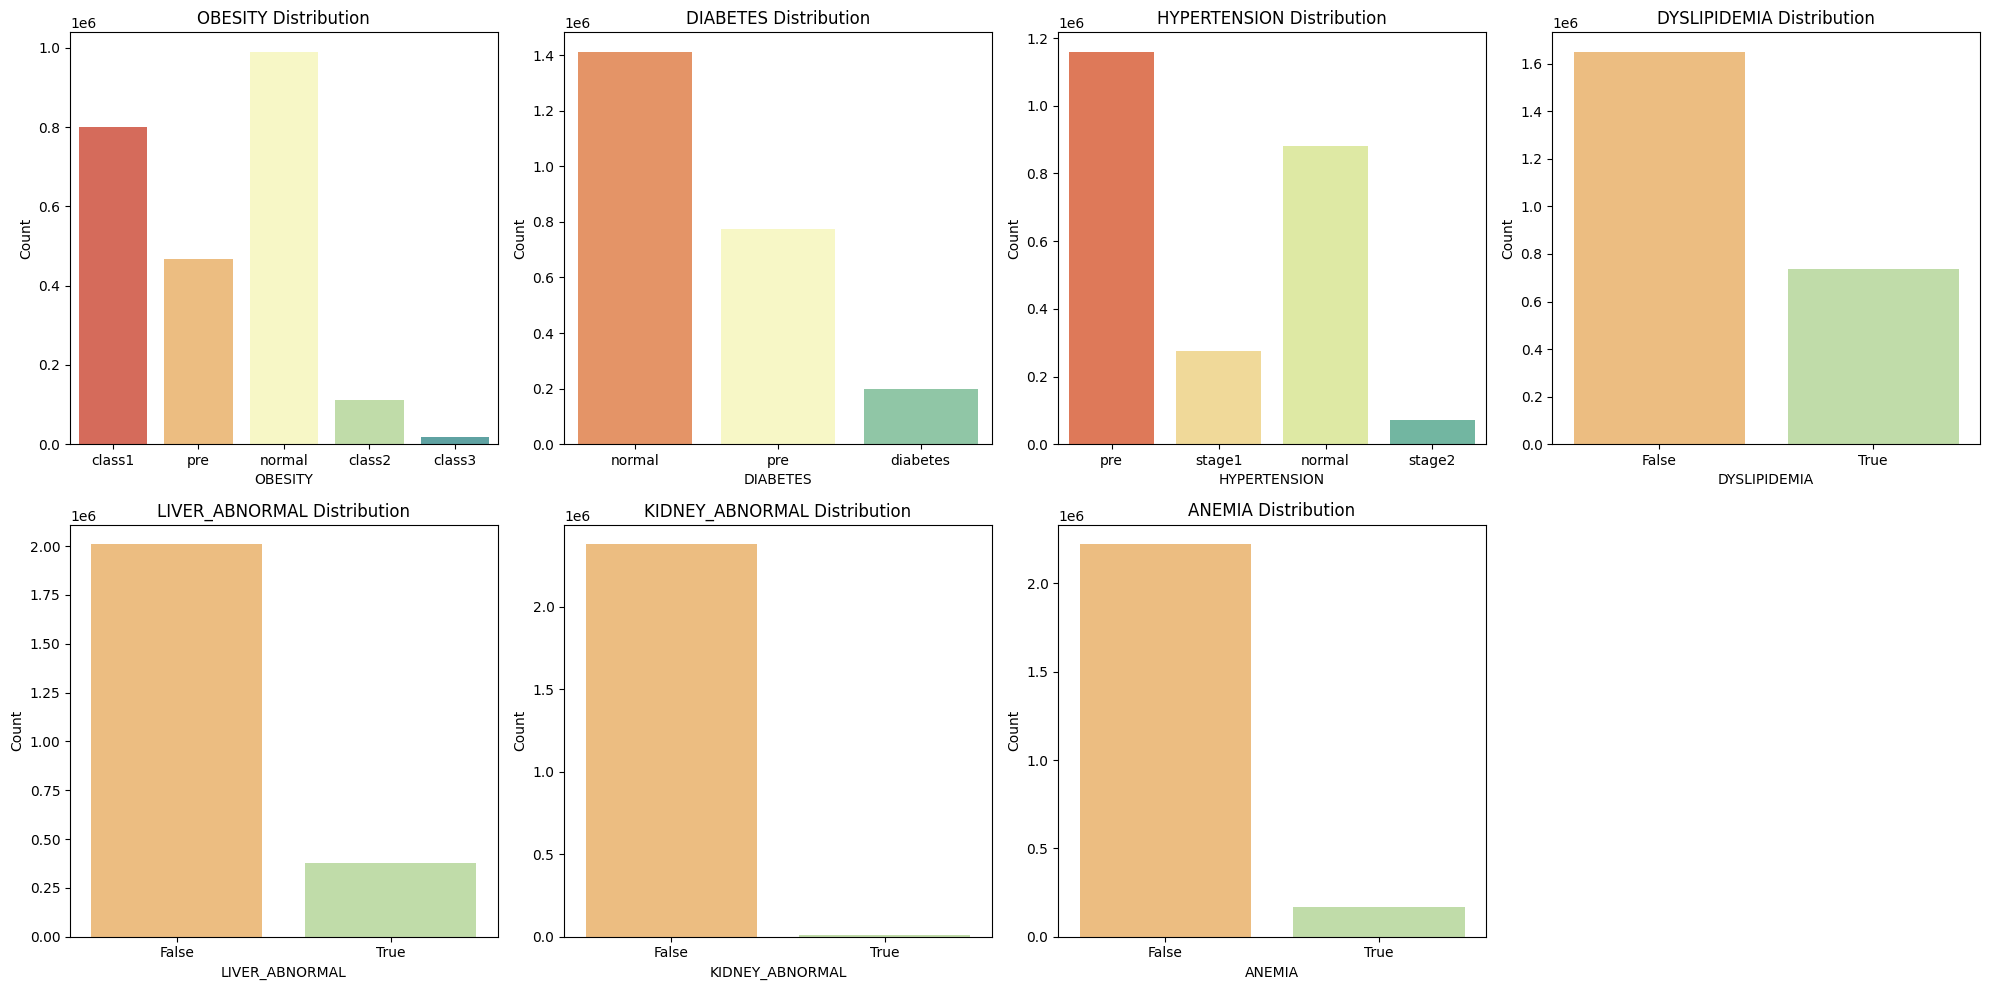

In [149]:
# 시각화할 변수 리스트
target_vars = ['OBESITY', 'DIABETES', 'HYPERTENSION', 'DYSLIPIDEMIA', 
               'LIVER_ABNORMAL', 'KIDNEY_ABNORMAL', 'ANEMIA']

# 서브플롯 설정 (2행 4열: 8개의 칸 중 7개 사용)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2차원 배열 -> 1차원으로 평탄화

# 각 변수에 대해 countplot 그리기
for i, var in enumerate(target_vars):
    sns.countplot(x=var, data=df, palette="Spectral", ax=axes[i])
    axes[i].set_title(f'{var} Distribution')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

# 사용하지 않는 마지막 subplot 숨기기 (예: 8번째 subplot)
for j in range(len(target_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


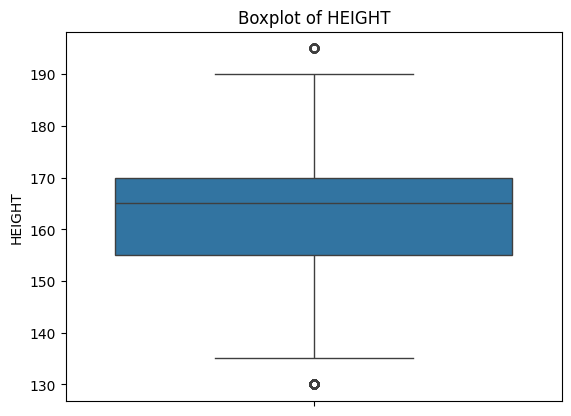

In [150]:
sns.boxplot(y=df["HEIGHT"])  # y축에 수치형 컬럼
plt.title("Boxplot of HEIGHT")
plt.ylabel("HEIGHT")
plt.show()

In [194]:
# IQR 계산
q1 = df["HEIGHT"].quantile(0.25)
q3 = df["HEIGHT"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치만 추출
outliers = df[(df["HEIGHT"] < lower_bound) | (df["HEIGHT"] > upper_bound)]
print("이상치 수치값들:\n", outliers["HEIGHT"].values)

outlier_count = outliers.shape[0]
total_count = df.shape[0]
outlier_ratio = outlier_count / total_count * 100

print(f"이상치 개수: {outlier_count}")
print(f"전체 대비 이상치 비율: {outlier_ratio:.2f}%")


이상치 수치값들:
 [130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130
 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130
 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130
 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130
 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130
 130 130 130 130 130 130 130 130 130 130 130 195 195 130 130 195 130 130
 130 130 130 130 130 130 195 130 130 130 130 195 195 130 130 130 130 130
 130 130 130 130 130 195 130 130 130 130 130 195 130 130 130 130 195 130
 195 130 130 130 195 130 130 130 130 130 130 130 130 130 130 130 130 130
 130 130 130 130 130 130 130 130 130 195 130 130 130 195 130 130 130 195
 130 130 130 130 130 130 130 130 130 130 195 195 195 130 130 130 130 130
 195 195 130 195 130 195 195 130 130 195 130 130 130 130 195 195 130 195
 195 130 130 130 130 130 130 130 195 130 130 195 195 130 130 130 130 130
 130 195 130 195 130 130 130 130 130 130

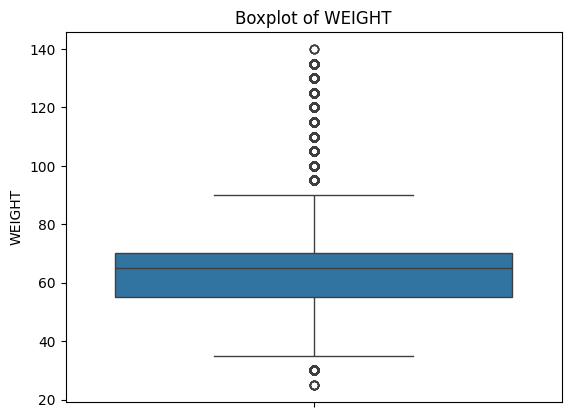

In [152]:
sns.boxplot(y=df["WEIGHT"])  # y축에 수치형 컬럼
plt.title("Boxplot of WEIGHT")
plt.ylabel("WEIGHT")
plt.show()

In [153]:
# IQR 계산
q1 = df["WEIGHT"].quantile(0.25)
q3 = df["WEIGHT"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 이상치만 추출
outliers = df[(df["WEIGHT"] < lower_bound) | (df["WEIGHT"] > upper_bound)]
print("이상치 수치값들:\n", outliers["WEIGHT"].values)

outlier_count = outliers.shape[0]
total_count = df.shape[0]
outlier_ratio = outlier_count / total_count * 100

print(f"이상치 개수: {outlier_count}")
print(f"전체 대비 이상치 비율: {outlier_ratio:.2f}%")


이상치 수치값들:
 [ 95 120  95 ... 120 120 105]
이상치 개수: 59438
전체 대비 이상치 비율: 2.49%


In [154]:
numeric_cols = df.select_dtypes(include=np.number).columns  # 수치형 컬럼만 선택

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    total_count = df.shape[0]
    outlier_ratio = outlier_count / total_count * 100

    print(f"\n [ {col} ]")
    print("이상치 수치값들:", outliers[col].values[:10], "...")  # 너무 많을 수 있으니 일부만 출력
    print(f"이상치 개수: {outlier_count}")
    print(f"전체 대비 이상치 비율: {outlier_ratio:.2f}%")



 [ SEX ]
이상치 수치값들: [] ...
이상치 개수: 0
전체 대비 이상치 비율: 0.00%

 [ AGE_GROUP ]
이상치 수치값들: [] ...
이상치 개수: 0
전체 대비 이상치 비율: 0.00%

 [ SIDO ]
이상치 수치값들: [] ...
이상치 개수: 0
전체 대비 이상치 비율: 0.00%

 [ HEIGHT ]
이상치 수치값들: [130 130 130 130 130 130 130 130 130 130] ...
이상치 개수: 492
전체 대비 이상치 비율: 0.02%

 [ WEIGHT ]
이상치 수치값들: [ 95 120  95 105 100  95  95  95 105  95] ...
이상치 개수: 59438
전체 대비 이상치 비율: 2.49%

 [ WAIST ]
이상치 수치값들: [110.  109.   54.  110.  114.  110.8 111.  110.  116.  112. ] ...
이상치 개수: 20114
전체 대비 이상치 비율: 0.84%

 [ BP_HIGH ]
이상치 수치값들: [167 183 184 163 180 195  84 165 184 165] ...
이상치 개수: 30185
전체 대비 이상치 비율: 1.26%

 [ BP_LWST ]
이상치 수치값들: [105 102 109 104 115 106 115  51 102 111] ...
이상치 개수: 35712
전체 대비 이상치 비율: 1.50%

 [ BLDS ]
이상치 수치값들: [137 155 160 140 161 324 192 155 217 229] ...
이상치 개수: 160263
전체 대비 이상치 비율: 6.72%

 [ TOT_CHOLE ]
이상치 수치값들: [315. 299.  90. 384. 307. 320. 306. 303. 335. 310.] ...
이상치 개수: 27715
전체 대비 이상치 비율: 1.16%

 [ TRIGLYCERIDE ]
이상치 수치값들: [333. 512. 513. 291. 326. 315. 414. 387. 

In [155]:
df.isnull().sum()

Year_ID             0
SEX                 0
AGE_GROUP           0
SIDO                0
HEIGHT              0
WEIGHT              0
WAIST               0
BP_HIGH             0
BP_LWST             0
BLDS                0
TOT_CHOLE           0
TRIGLYCERIDE        0
HDL_CHOLE           0
LDL_CHOLE           0
HMG                 0
OLIG_PROTE_CD       0
CREATININE          0
SGOT_AST            0
SGPT_ALT            0
GAMMA_GTP           0
SMK_STAT_TYPE_CD    0
DRK_YN              0
BMI                 0
OBESITY             0
DYSLIPIDEMIA        0
DIABETES            0
HYPERTENSION        0
LIVER_ABNORMAL      0
KIDNEY_ABNORMAL     0
ANEMIA              0
dtype: int64

In [156]:
df['OBESITY'].value_counts()

OBESITY
normal    989724
class1    799269
pre       467218
class2    112755
class3     17547
Name: count, dtype: int64

In [195]:
# 맵핑 적용

# OBESITY
obesity_map = {'normal': 0, 'pre': 1, 'class1': 2, 'class2': 3, 'class3': 4}
df['OBESITY'] = df['OBESITY'].map(obesity_map)

# DIABETES
diabetes_map = {'normal': 0, 'pre': 1, 'diabetes': 2}
df['DIABETES'] = df['DIABETES'].map(diabetes_map)

# HYPERTENSION
hypertension_map = {'normal': 0, 'pre': 1, 'stage1': 2, 'stage2': 3}
df['HYPERTENSION'] = df['HYPERTENSION'].map(hypertension_map)

# 이진 변수들 (True/False)
binary_cols = ['DYSLIPIDEMIA', 'LIVER_ABNORMAL', 'KIDNEY_ABNORMAL', 'ANEMIA']
for col in binary_cols:
    df[col] = df[col].map({False: 0, True: 1})


# 확인
print(df[['OBESITY', 'DIABETES', 'HYPERTENSION','DYSLIPIDEMIA','LIVER_ABNORMAL','KIDNEY_ABNORMAL','ANEMIA']].head())
print(df[['OBESITY', 'DIABETES', 'HYPERTENSION','DYSLIPIDEMIA','LIVER_ABNORMAL','KIDNEY_ABNORMAL','ANEMIA']].tail())


   OBESITY  DIABETES  HYPERTENSION  DYSLIPIDEMIA  LIVER_ABNORMAL  \
0        2         0             1             0               0   
1        1         1             1             0               0   
2        2         0             1             0               1   
3        2         0             2             0               0   
4        0         1             1             0               0   

   KIDNEY_ABNORMAL  ANEMIA  
0                0       0  
1                0       0  
2                0       0  
3                0       0  
4                0       0  
         OBESITY  DIABETES  HYPERTENSION  DYSLIPIDEMIA  LIVER_ABNORMAL  \
2386508        3         0             1             1               1   
2386509        4         2             1             1               1   
2386510        2         2             1             0               1   
2386511        0         0             0             0               1   
2386512        0         2             1       

In [196]:
df['OBESITY'].value_counts()

OBESITY
0    989724
2    799269
1    467218
3    112755
4     17547
Name: count, dtype: int64

In [159]:
anemia_counts =df['ANEMIA'].value_counts()
print(anemia_counts)
KIDNEY_ABNORMAL_counts=df['KIDNEY_ABNORMAL'].value_counts()
print(KIDNEY_ABNORMAL_counts)

ANEMIA
0    2220221
1     166292
Name: count, dtype: int64
KIDNEY_ABNORMAL
0    2378905
1       7608
Name: count, dtype: int64


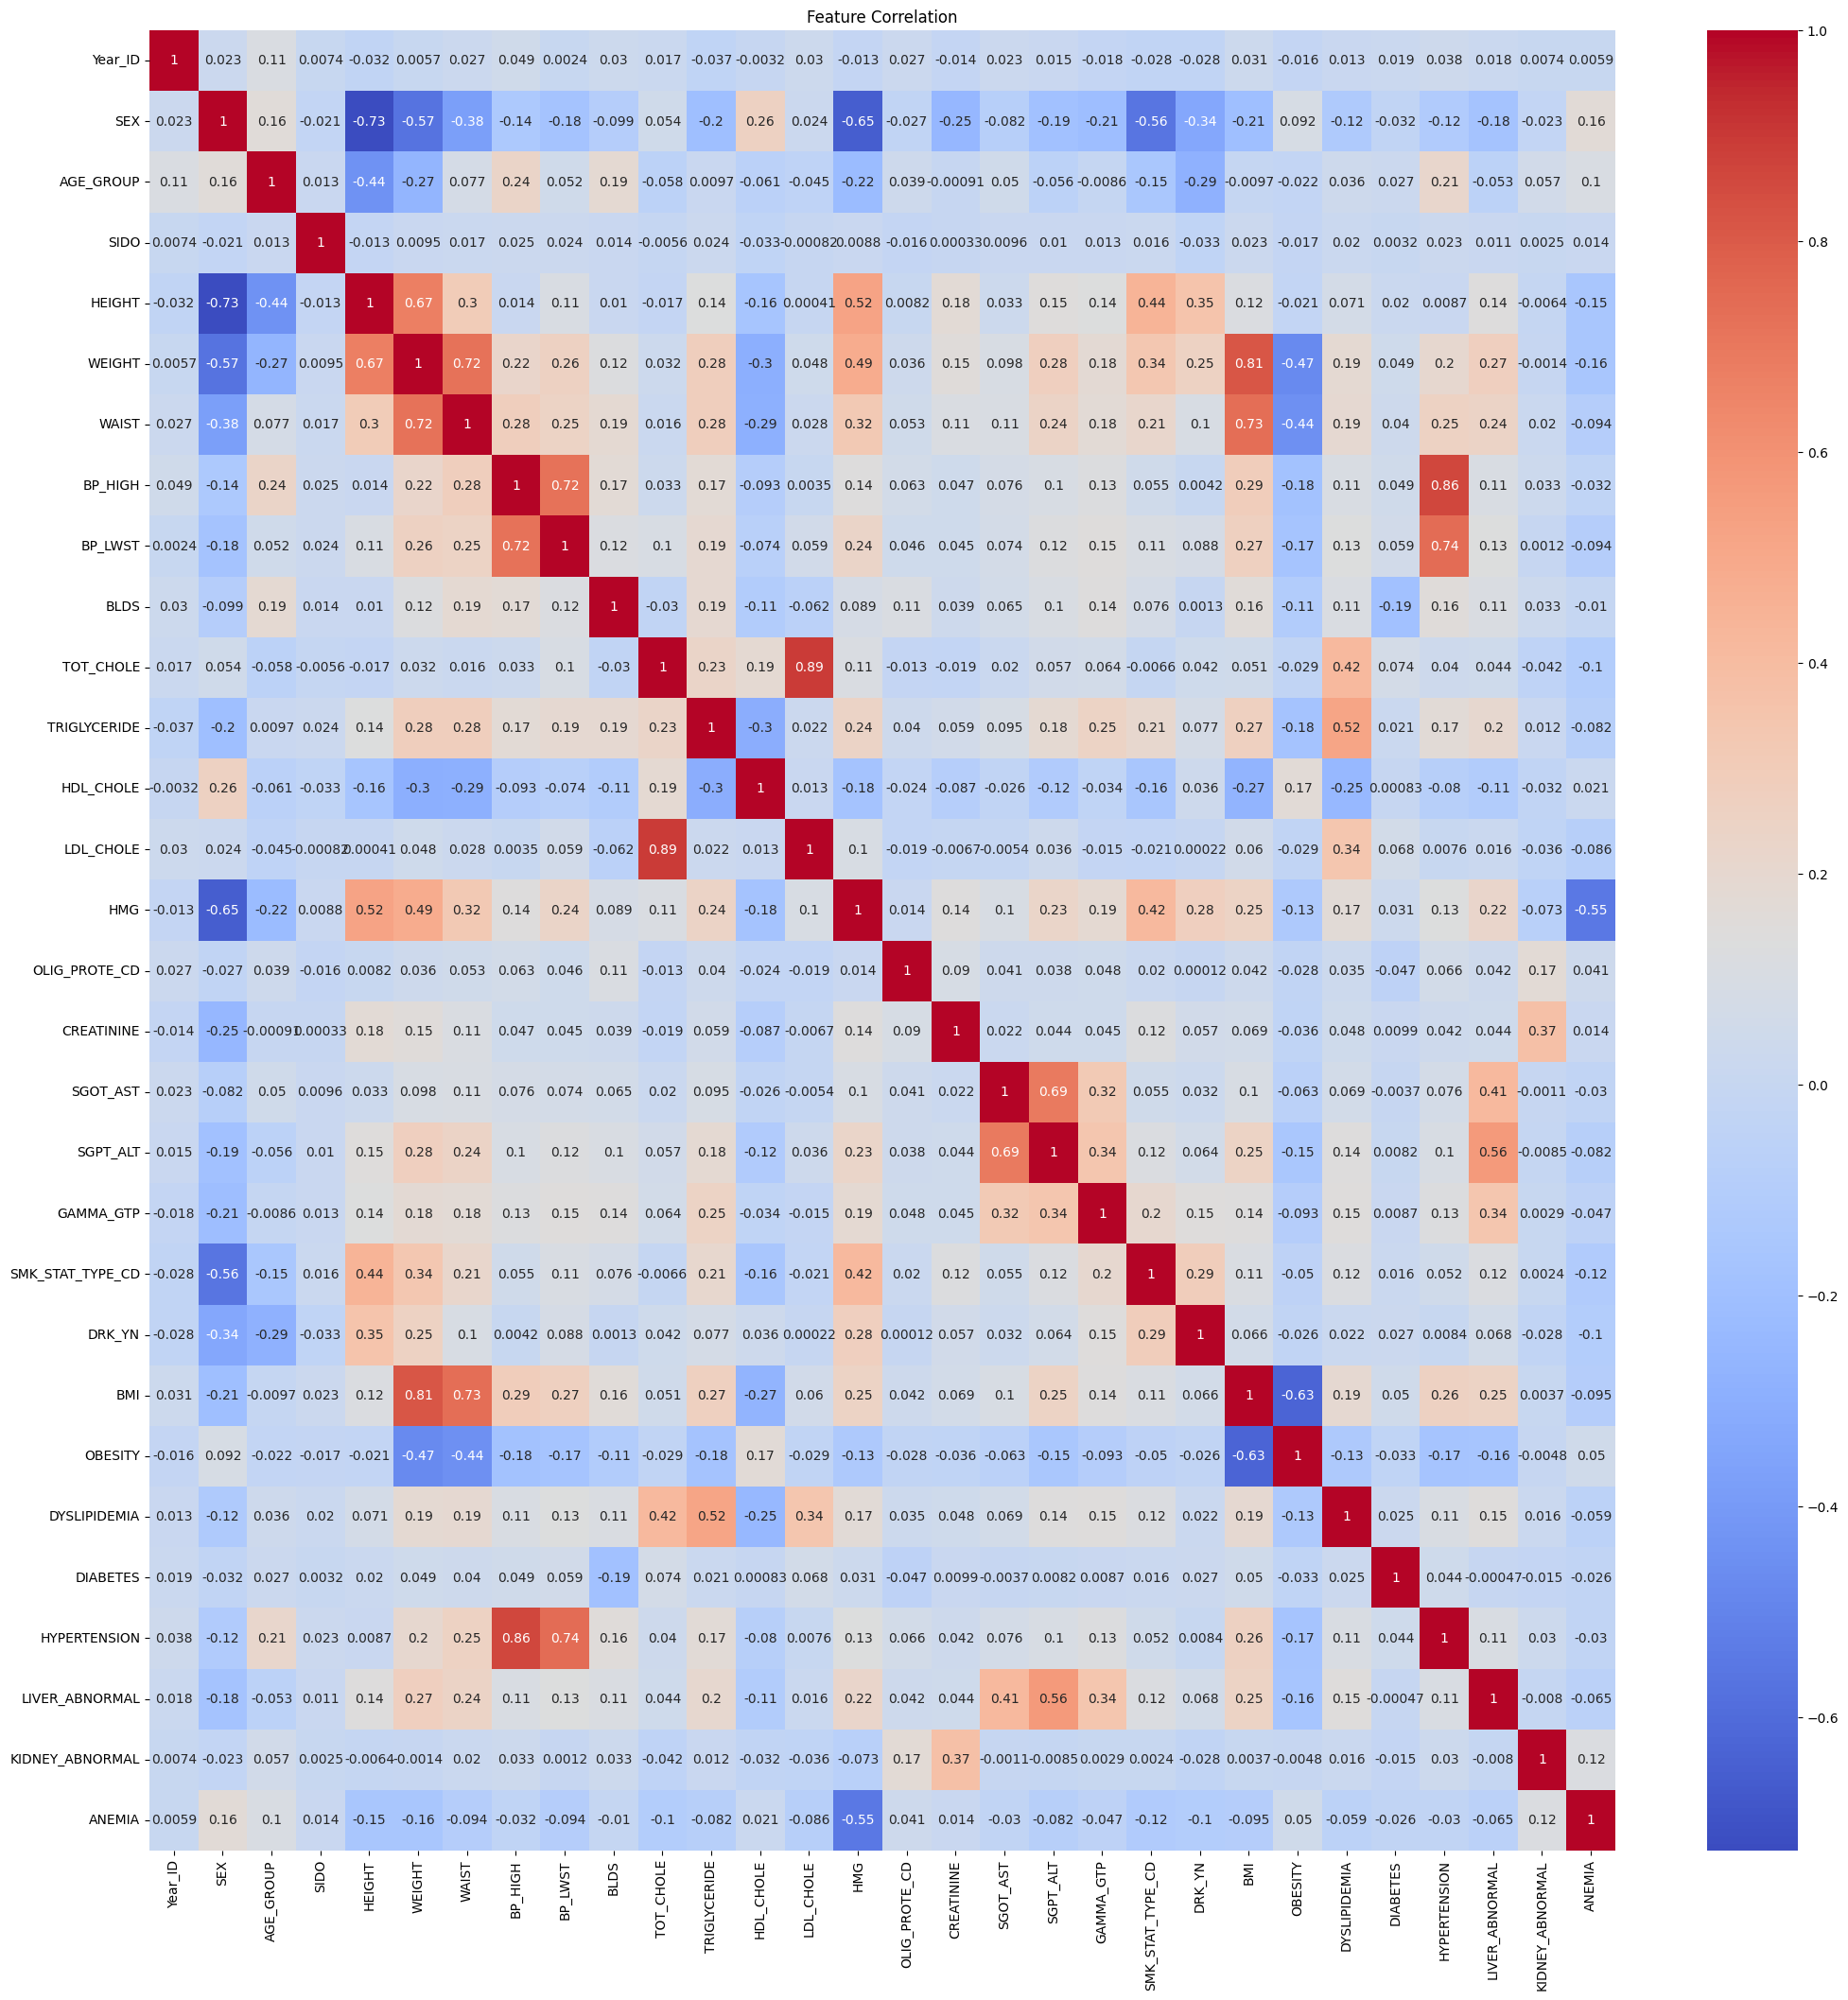

In [29]:
# 모든 수치형 컬럼 간 상관관계 분석
corr = df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [197]:
# 입력 변수만 추출
input_features = ["HEIGHT", "WEIGHT", "WAIST","BP_HIGH", "BP_LWST", 
                  "BLDS","TOT_CHOLE", "TRIGLYCERIDE", "HDL_CHOLE", 
                  "LDL_CHOLE", "HMG", "OLIG_PROTE_CD",
                  "CREATININE", "SGOT_AST", "SGPT_ALT", "GAMMA_GTP", 
                  "SMK_STAT_TYPE_CD", "DRK_YN", "BMI"]

# RobustScaler 적용
scaler = RobustScaler()
df[input_features] = scaler.fit_transform(df[input_features])

In [31]:
df

,Year_ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
0,2017_1,1,8,43,0.333333,0.666667,0.615385,-0.105263,0.333333,0.117647,-0.039216,-0.180723,-0.368421,0.270833,1.227273,0.0,0.666667,-0.2,0.8750,0.666667,0.0,0.0,0.456522,0,0,1,1,0,0,0
1,2017_2,1,7,11,1.000000,1.000000,0.538462,0.421053,0.500000,0.529412,0.647059,0.168675,0.000000,0.729167,0.636364,0.0,0.333333,-0.3,0.9375,0.125000,2.0,-1.0,0.173913,4,0,2,1,0,0,0
2,2017_3,1,9,41,0.000000,0.666667,0.692308,-0.105263,-0.500000,0.058824,-1.156863,-0.036145,-0.736842,-0.812500,0.636364,0.0,0.333333,2.4,0.6875,1.833333,0.0,-1.0,0.782609,0,0,1,1,1,0,0
3,2017_4,1,11,48,0.666667,1.000000,0.692308,1.210526,0.916667,-0.117647,0.117647,-0.012048,1.105263,-0.187500,1.454545,0.0,1.000000,0.6,0.8125,-0.250000,0.0,-1.0,0.478261,0,0,1,2,0,0,0
4,2017_5,1,11,30,0.000000,-0.333333,-0.153846,0.842105,0.500000,0.235294,0.078431,-0.036145,0.315789,0.083333,-0.272727,0.0,0.000000,-0.4,-0.5625,0.041667,0.0,-1.0,-0.413043,3,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386508,2022_2134210,1,6,43,0.333333,1.666667,1.292308,0.315789,0.666667,-0.529412,0.980392,0.518072,-1.052632,1.395833,0.636364,0.0,0.333333,7.2,14.3750,2.208333,0.0,0.0,1.565217,1,1,1,1,1,0,0
2386509,2022_1686113,2,15,27,-1.000000,1.333333,2.615385,0.736842,0.416667,2.176471,0.882353,0.012048,0.947368,0.666667,-0.909091,0.0,2.000000,3.6,1.7500,0.041667,0.0,-1.0,3.021739,2,1,0,1,1,0,0
2386510,2022_902951,1,12,45,0.000000,1.000000,1.246154,-0.157895,0.583333,4.941176,0.196078,1.012048,-0.421053,0.145833,0.590909,0.0,0.666667,2.5,3.8125,1.500000,1.0,0.0,1.195652,0,0,0,1,1,0,0
2386511,2022_3721315,1,6,47,0.666667,0.000000,-0.507692,-0.684211,-1.333333,-0.352941,-0.333333,-0.554217,-0.052632,-0.020833,-0.318182,0.0,1.000000,22.2,3.1875,-0.291667,1.0,0.0,-0.586957,3,0,1,0,1,0,0


이상치 제거
(제거하니 소수클래스 제거됨)

In [ ]:
# input_features = ["HEIGHT", "WEIGHT", "WAIST","BP_HIGH", "BP_LWST", 
#                   "BLDS","TOT_CHOLE", "TRIGLYCERIDE", "HDL_CHOLE", 
#                   "LDL_CHOLE", "HMG", "OLIG_PROTE_CD",
#                   "CREATININE", "SGOT_AST", "SGPT_ALT", "GAMMA_GTP", 
#                   "SMK_STAT_TYPE_CD", "DRK_YN", "BMI"]

# for col in input_features:
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
    
#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [161]:
print(df['OBESITY'].value_counts())

OBESITY
0    989724
2    799269
1    467218
3    112755
4     17547
Name: count, dtype: int64


In [ ]:

# # 다수 클래스: OBESITY == 0 (normal)
# data_majority = df[df["OBESITY"] == 0]

# # 소수 클래스들
# data_min1 = df[df["OBESITY"] == 1]  # pre
# data_min2 = df[df["OBESITY"] == 2]  # class1
# data_min3 = df[df["OBESITY"] == 3]  # class2
# data_min4 = df[df["OBESITY"] == 4]  # class3

# # 각 소수 클래스를 다수 클래스 수에 맞게 upsampling
# data_min1_upsampled = resample(data_min1, replace=True, n_samples=len(data_majority), random_state=42)
# data_min2_upsampled = resample(data_min2, replace=True, n_samples=len(data_majority), random_state=42)
# data_min3_upsampled = resample(data_min3, replace=True, n_samples=len(data_majority), random_state=42)
# data_min4_upsampled = resample(data_min4, replace=True, n_samples=len(data_majority), random_state=42)

# # 합치기
# df_balanced = pd.concat([data_majority, data_min1_upsampled, data_min2_upsampled,
#                          data_min3_upsampled, data_min4_upsampled])

# # 섞기 (중요!)
# df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# # 확인
# print(df_balanced["OBESITY"].value_counts())


OBESITY
0    989724
4    989724
1    989724
3    989724
2    989724
Name: count, dtype: int64


In [198]:
# 1. 원본 데이터에서 분리
target = 'OBESITY'
X = df.drop(columns=[target, 'BMI'])
Y = df[target]

# 2. 원본에서 train/test 나눔 (불균형 그대로)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# 3. 학습 데이터만 합쳐서 샘플링
train_df = pd.concat([X_train, Y_train], axis=1)

# 클래스별 샘플링
major = train_df[train_df["OBESITY"] == 0]
minor_1 = resample(train_df[train_df["OBESITY"] == 1], replace=True, n_samples=len(major), random_state=42)
minor_2 = resample(train_df[train_df["OBESITY"] == 2], replace=True, n_samples=len(major), random_state=42)
minor_3 = resample(train_df[train_df["OBESITY"] == 3], replace=True, n_samples=len(major), random_state=42)
minor_4 = resample(train_df[train_df["OBESITY"] == 4], replace=True, n_samples=len(major), random_state=42)

train_df_balanced = pd.concat([major, minor_1, minor_2, minor_3, minor_4]).sample(frac=1, random_state=42)

In [199]:
# 타겟 변수들에 대해 결측치가 생겼는지 확인
target_features = ["DYSLIPIDEMIA", "DIABETES", "HYPERTENSION", 
                   "LIVER_ABNORMAL", "KIDNEY_ABNORMAL", "ANEMIA"]

# 결측치 확인
print(df[target_features].isnull().sum())

DYSLIPIDEMIA       0
DIABETES           0
HYPERTENSION       0
LIVER_ABNORMAL     0
KIDNEY_ABNORMAL    0
ANEMIA             0
dtype: int64


In [34]:
df.describe()

,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
count,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1493005.0,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1.493005e+06,1493005.0,1.493005e+06
mean,1.508049e+00,1.078089e+01,3.357023e+01,-2.143210e-01,-2.349887e-01,-1.755638e-01,-4.236683e-02,-9.575247e-02,-6.798094e-02,-1.798920e-02,-4.279496e-03,1.553560e-01,3.565977e-02,-1.239677e-01,0.0,1.090655e-01,-3.556549e-02,-6.912721e-02,-4.864095e-02,4.996989e-01,-4.069310e-01,-1.104961e-01,2.289467e+00,2.224701e-01,1.297861e+00,6.847311e-01,2.178760e-02,0.0,6.785711e-02
std,4.999354e-01,2.832286e+00,1.271629e+01,6.195283e-01,7.281461e-01,6.636318e-01,6.973816e-01,7.519638e-01,6.650319e-01,6.914686e-01,6.011720e-01,7.004479e-01,6.724170e-01,6.472760e-01,0.0,6.336942e-01,5.730875e-01,4.961041e-01,4.543404e-01,7.523337e-01,4.912620e-01,6.626030e-01,1.551714e+00,4.159054e-01,4.882119e-01,6.705666e-01,1.459894e-01,0.0,2.515006e-01
min,1.000000e+00,5.000000e+00,1.100000e+01,-2.000000e+00,-2.000000e+00,-2.038462e+00,-1.947368e+00,-2.000000e+00,-1.941176e+00,-1.960784e+00,-1.277108e+00,-1.842105e+00,-1.895833e+00,-2.045455e+00,0.0,-1.666667e+00,-1.700000e+00,-1.250000e+00,-9.583333e-01,0.000000e+00,-1.000000e+00,-1.891304e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,1.000000e+00,9.000000e+00,2.600000e+01,-6.666667e-01,-6.666667e-01,-6.307692e-01,-5.789474e-01,-5.833333e-01,-5.294118e-01,-5.098039e-01,-4.578313e-01,-3.684211e-01,-4.375000e-01,-5.909091e-01,0.0,-3.333333e-01,-4.000000e-01,-4.375000e-01,-3.750000e-01,0.000000e+00,-1.000000e+00,-5.869565e-01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
50%,2.000000e+00,1.100000e+01,4.100000e+01,-3.333333e-01,-3.333333e-01,-1.538462e-01,-1.052632e-01,-8.333333e-02,-1.176471e-01,-3.921569e-02,-1.325301e-01,1.052632e-01,0.000000e+00,-1.363636e-01,0.0,0.000000e+00,-1.000000e-01,-1.875000e-01,-1.666667e-01,0.000000e+00,0.000000e+00,-1.086957e-01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.0,0.000000e+00
75%,2.000000e+00,1.300000e+01,4.300000e+01,3.333333e-01,3.333333e-01,3.076923e-01,4.210526e-01,3.333333e-01,2.941176e-01,4.509804e-01,3.253012e-01,6.315789e-01,4.791667e-01,3.636364e-01,0.0,6.666667e-01,3.000000e-01,1.875000e-01,1.666667e-01,1.000000e+00,0.000000e+00,3.260870e-01,3.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.0,0.000000e+00
max,2.000000e+00,1.800000e+01,5.000000e+01,1.666667e+00,1.666667e+00,1.961538e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.019608e+00,1.939759e+00,2.105263e+00,1.937500e+00,1.954545e+00,0.0,2.000000e+00,1.800000e+00,1.500000e+00,1.375000e+00,2.000000e+00,0.000000e+00,1.586957e+00,4.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,0.0,1.000000e+00


In [35]:
df.head()

,Year_ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
0,2017_1,1,8,43,0.333333,0.666667,0.615385,-0.105263,0.333333,0.117647,-0.039216,-0.180723,-0.368421,0.270833,1.227273,0.0,0.666667,-0.2,0.8750,0.666667,0.0,0.0,0.456522,0,0,1,1,0,0,0
1,2017_2,1,7,11,1.000000,1.000000,0.538462,0.421053,0.500000,0.529412,0.647059,0.168675,0.000000,0.729167,0.636364,0.0,0.333333,-0.3,0.9375,0.125000,2.0,-1.0,0.173913,4,0,2,1,0,0,0
3,2017_4,1,11,48,0.666667,1.000000,0.692308,1.210526,0.916667,-0.117647,0.117647,-0.012048,1.105263,-0.187500,1.454545,0.0,1.000000,0.6,0.8125,-0.250000,0.0,-1.0,0.478261,0,0,1,2,0,0,0
4,2017_5,1,11,30,0.000000,-0.333333,-0.153846,0.842105,0.500000,0.235294,0.078431,-0.036145,0.315789,0.083333,-0.272727,0.0,0.000000,-0.4,-0.5625,0.041667,0.0,-1.0,-0.413043,3,0,2,1,0,0,0
6,2017_7,2,10,27,-1.000000,-0.666667,-1.000000,-1.105263,-1.500000,-0.470588,0.019608,-0.385542,0.578947,0.041667,-0.954545,0.0,0.000000,-0.4,-0.5625,-0.500000,0.0,-1.0,0.108696,4,0,1,0,0,0,0


In [ ]:
# target = 'OBESITY'

# # X, Y 분리
# X = df_balanced.drop(columns=[target, 'BMI'])
# Y = df_balanced[target]

# # 샘플링 후 데이터에서 분리
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)

# # 3. 학습 데이터만 합쳐서 샘플링
# train_df = pd.concat([X_train, Y_train], axis=1)

# # 스케일링
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [200]:
# 4. 다시 X/Y 분리
X_train_bal = train_df_balanced.drop(columns=['OBESITY'])
Y_train_bal = train_df_balanced['OBESITY']

# 4. 테스트셋에서도 BMI 제거 (혹시모를 실수 방지)
X_test = X_test.drop(columns=["BMI"], errors="ignore")

# 5. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

In [201]:
print(Y_train_bal.value_counts(normalize=True))

OBESITY
1    0.2
3    0.2
0    0.2
4    0.2
2    0.2
Name: proportion, dtype: float64


In [175]:
# 원본 인덱스 기준 중복 여부 확인
duplicated = X_train.index.intersection(X_test.index)
print(f"Train/Test 겹치는 샘플 수: {len(duplicated)}")

Train/Test 겹치는 샘플 수: 0


In [184]:
# 6. 모델 학습 및 평가
model = RandomForestClassifier()
model.fit(X_train_scaled, Y_train_bal)

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[197749    179     17      0      0]
 [   181  93040    223      0      0]
 [    10    106 159636    102      0]
 [     0      0    269  22271     11]
 [     0      0      5    248   3256]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197945
           1       1.00      1.00      1.00     93444
           2       1.00      1.00      1.00    159854
           3       0.98      0.99      0.99     22551
           4       1.00      0.93      0.96      3509

    accuracy                           1.00    477303
   macro avg       0.99      0.98      0.99    477303
weighted avg       1.00      1.00      1.00    477303



In [185]:
print(Y_test.value_counts())

OBESITY
0    197945
2    159854
1     93444
3     22551
4      3509
Name: count, dtype: int64


In [202]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Stratified K-Fold 설정 (라벨 비율 유지하며 K개의 폴드로 나눔)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 모델 정의
model = RandomForestClassifier(random_state=42)

# F1 Macro 스코어로 평가
f1_macro = make_scorer(f1_score, average='macro')

# 교차검증 수행
scores = cross_val_score(model, X_train_scaled, Y_train_bal, cv=skf, scoring=f1_macro)

# 결과 출력
print("F1 Macro (각 fold):", scores)
print("F1 Macro 평균:", np.mean(scores))


KeyboardInterrupt: 

[[198210    163     13      0      0]
 [    34 197753     67      0      0]
 [     2     22 198015     56      0]
 [     0      0      0 198047      0]
 [     0      0      0      0 197342]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198386
           1       1.00      1.00      1.00    197854
           2       1.00      1.00      1.00    198095
           3       1.00      1.00      1.00    198047
           4       1.00      1.00      1.00    197342

    accuracy                           1.00    989724
   macro avg       1.00      1.00      1.00    989724
weighted avg       1.00      1.00      1.00    989724



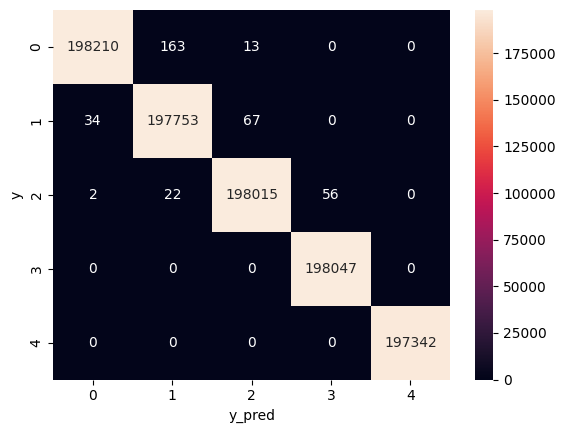

In [176]:
model_1 = RandomForestClassifier()
model_1.fit(X_train_scaled,Y_train)
model_1.score(X_test_scaled,Y_test)
cm = confusion_matrix(Y_test,model_1.predict(X_test_scaled))
cr=classification_report(Y_test, model_1.predict(X_test_scaled))
print(cm)
print(cr)

sns.heatmap(cm, annot=True, fmt=".0f",color="white")
plt.xlabel('y_pred')
plt.ylabel('y')
plt.show()

In [170]:
# 상관계수 계산
corr_matrix = df.corr()

# OBESITY와 관련된 변수들만 추출
obesity_corr = corr_matrix['OBESITY'].sort_values(ascending=False)

# 출력
print(obesity_corr)


OBESITY             1.000000
BMI                 0.912649
WEIGHT              0.728583
WAIST               0.665121
BP_HIGH             0.266354
TRIGLYCERIDE        0.253028
BP_LWST             0.246975
HYPERTENSION        0.243369
LIVER_ABNORMAL      0.230615
SGPT_ALT            0.229538
HMG                 0.218306
DIABETES            0.182130
DYSLIPIDEMIA        0.178856
BLDS                0.152524
GAMMA_GTP           0.131274
SMK_STAT_TYPE_CD    0.096966
SGOT_AST            0.095453
HEIGHT              0.088687
CREATININE          0.062959
DRK_YN              0.053432
LDL_CHOLE           0.047864
OLIG_PROTE_CD       0.042054
TOT_CHOLE           0.041873
Year_ID             0.027697
SIDO                0.021784
AGE_GROUP           0.007924
KIDNEY_ABNORMAL     0.005235
ANEMIA             -0.081088
SEX                -0.180086
HDL_CHOLE          -0.248100
Name: OBESITY, dtype: float64


In [171]:
# OBESITY 클래스의 분포 확인
print(df['OBESITY'].value_counts())


OBESITY
0    989724
2    799269
1    467218
3    112755
4     17547
Name: count, dtype: int64


In [53]:
target = 'OBESITY'

# 타겟과 직접적으로 연관된 변수 제거
X = df.drop(columns=[target, 'BMI', 'HEIGHT', 'WEIGHT', 'WAIST'])
Y = df[target]

# 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# 스케일링 (트리 모델에선 생략 가능하지만 유지 가능)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[[ 44738      0  40078   2279]
 [  3181      0   1737     80]
 [ 24517      0 118866   2143]
 [ 22886      0  36266   1830]]
              precision    recall  f1-score   support

           0       0.47      0.51      0.49     87095
           1       0.00      0.00      0.00      4998
           3       0.60      0.82      0.69    145526
           4       0.29      0.03      0.05     60982

    accuracy                           0.55    298601
   macro avg       0.34      0.34      0.31    298601
weighted avg       0.49      0.55      0.49    298601



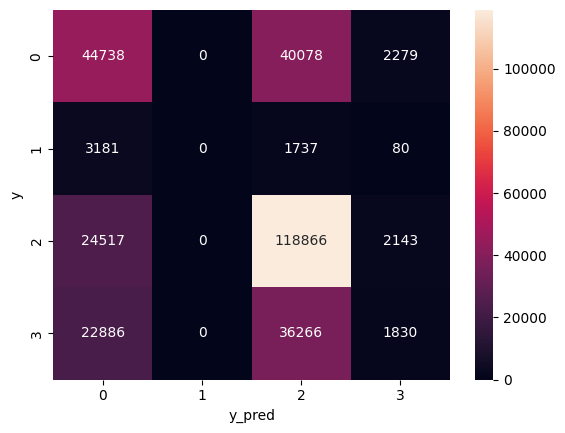

In [55]:
model_1 = RandomForestClassifier()
model_1.fit(X_train_scaled,Y_train)
model_1.score(X_test_scaled,Y_test)
cm = confusion_matrix(Y_test,model_1.predict(X_test_scaled))
cr=classification_report(Y_test, model_1.predict(X_test_scaled))
print(cm)
print(cr)

sns.heatmap(cm, annot=True, fmt=".0f",color="white")
plt.xlabel('y_pred')
plt.ylabel('y')
plt.show()

In [56]:
model_2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_2.fit(X_train_scaled, Y_train)

# 예측
y_pred_xgb = model_2.predict(X_test_scaled)

# 정확도
print("정확도:", model_2.score(X_test_scaled, Y_test))

# 혼동 행렬 & 분류 리포트
cm_xgb = confusion_matrix(Y_test, y_pred_xgb)
cr_xgb = classification_report(Y_test, y_pred_xgb)
print(cm_xgb)
print(cr_xgb)

# 시각화
sns.heatmap(cm_xgb, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('XGBoost Confusion Matrix')
plt.show()

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [0 1 3 4]

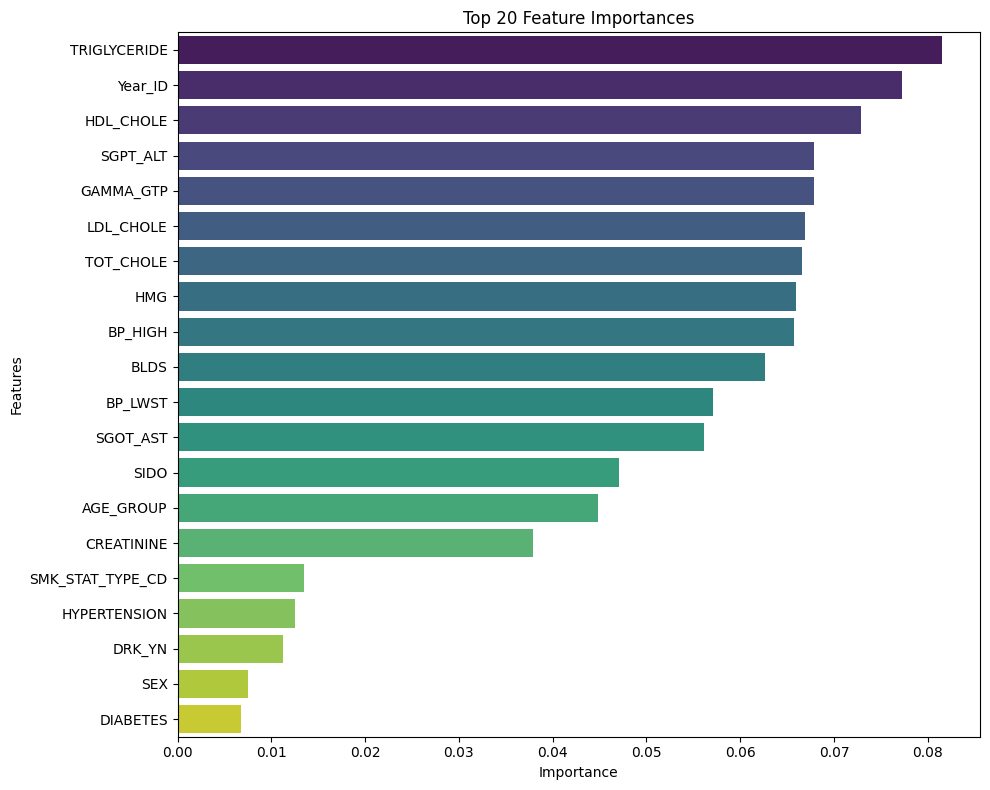

In [44]:
# 스케일링 후 DataFrame으로 다시 변환
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# 모델 학습
model_1 = RandomForestClassifier()
model_1.fit(X_train_scaled_df, Y_train)

# 중요도 시각화
importances = model_1.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x=feat_importances.sort_values(ascending=False)[:20],
            y=feat_importances.sort_values(ascending=False).index[:20],
            palette='viridis')
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
